## <font color=red> The purpose of this notebook is to predict car price through different regression algorithms </font>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import r2_score, make_scorer, mean_absolute_error
from sklearn.linear_model import SGDRegressor, LinearRegression,Lasso, Ridge
from xgboost import XGBRegressor

### Importing and reading data

In [2]:
data= pd.read_csv("CarPrice.csv")

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.shape

(205, 26)

In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Data cleaning

In [7]:
Company= data["CarName"].apply(lambda x : x.split(" ")[0])
data.insert(3, "Company", Company)
data.drop(["CarName"], axis=1, inplace=True)
data.head()

,car_ID,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
data.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
#Fixing Companies's names
data.Company = data.Company.str.lower()

def fix_Company_name(x,y):
    data.Company.replace(x,y,inplace=True)
    
fix_Company_name("maxda","mazda")
fix_Company_name("porcshce","porsche")
fix_Company_name("vokswagen","volkswagen")
fix_Company_name("vw","volkswagen")

In [10]:
data.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'toyouta', 'volkswagen', 'volvo'], dtype=object)

In [11]:
data.duplicated().sum()

0

In [12]:
data.columns

Index(['car_ID', 'symboling', 'Company', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Data visualization and Analysis

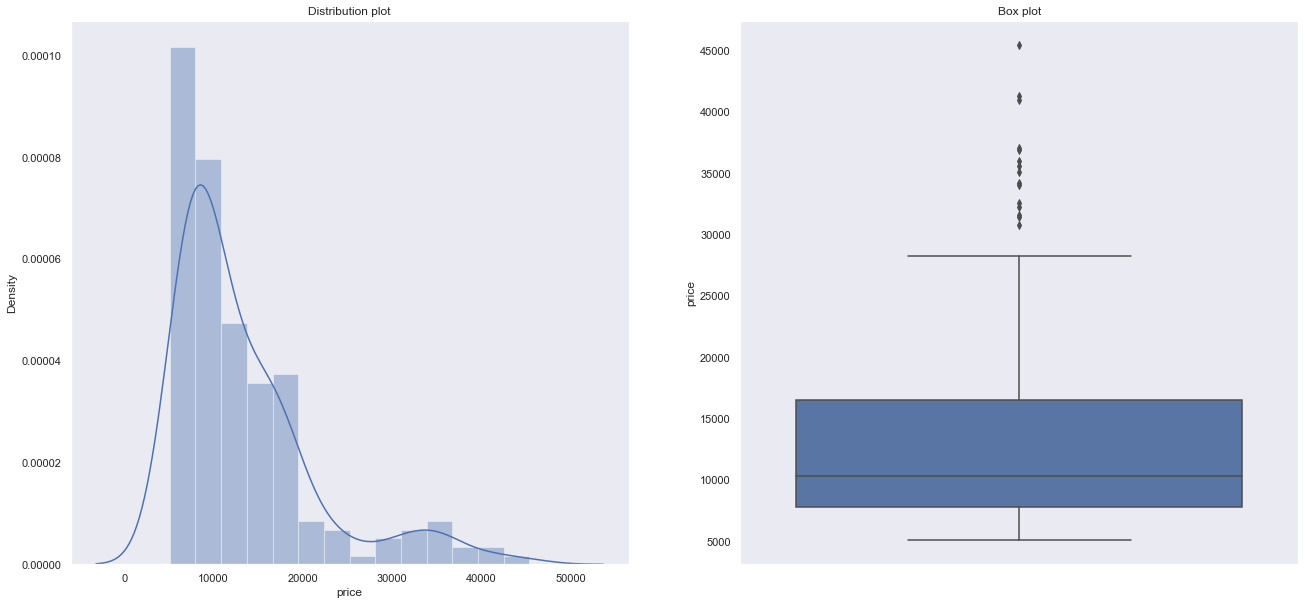

In [13]:
plt.figure(figsize=(22,10))
sns.set(style="dark") 

plt.subplot(1,2,1)
plt.title("Distribution plot")
sns.distplot(data.price)

plt.subplot(1,2,2)
plt.title("Box plot")
sns.boxplot(y=data.price);

In [14]:
print(data.price.describe(percentiles= [0.25,0.50,0.75,0.9,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


- The most prices in dataset are low (below 15000)
- Significant difference between the mean and the median of price distribtion
- High variance in the car price (15% of the price are between 18500 and 45400)

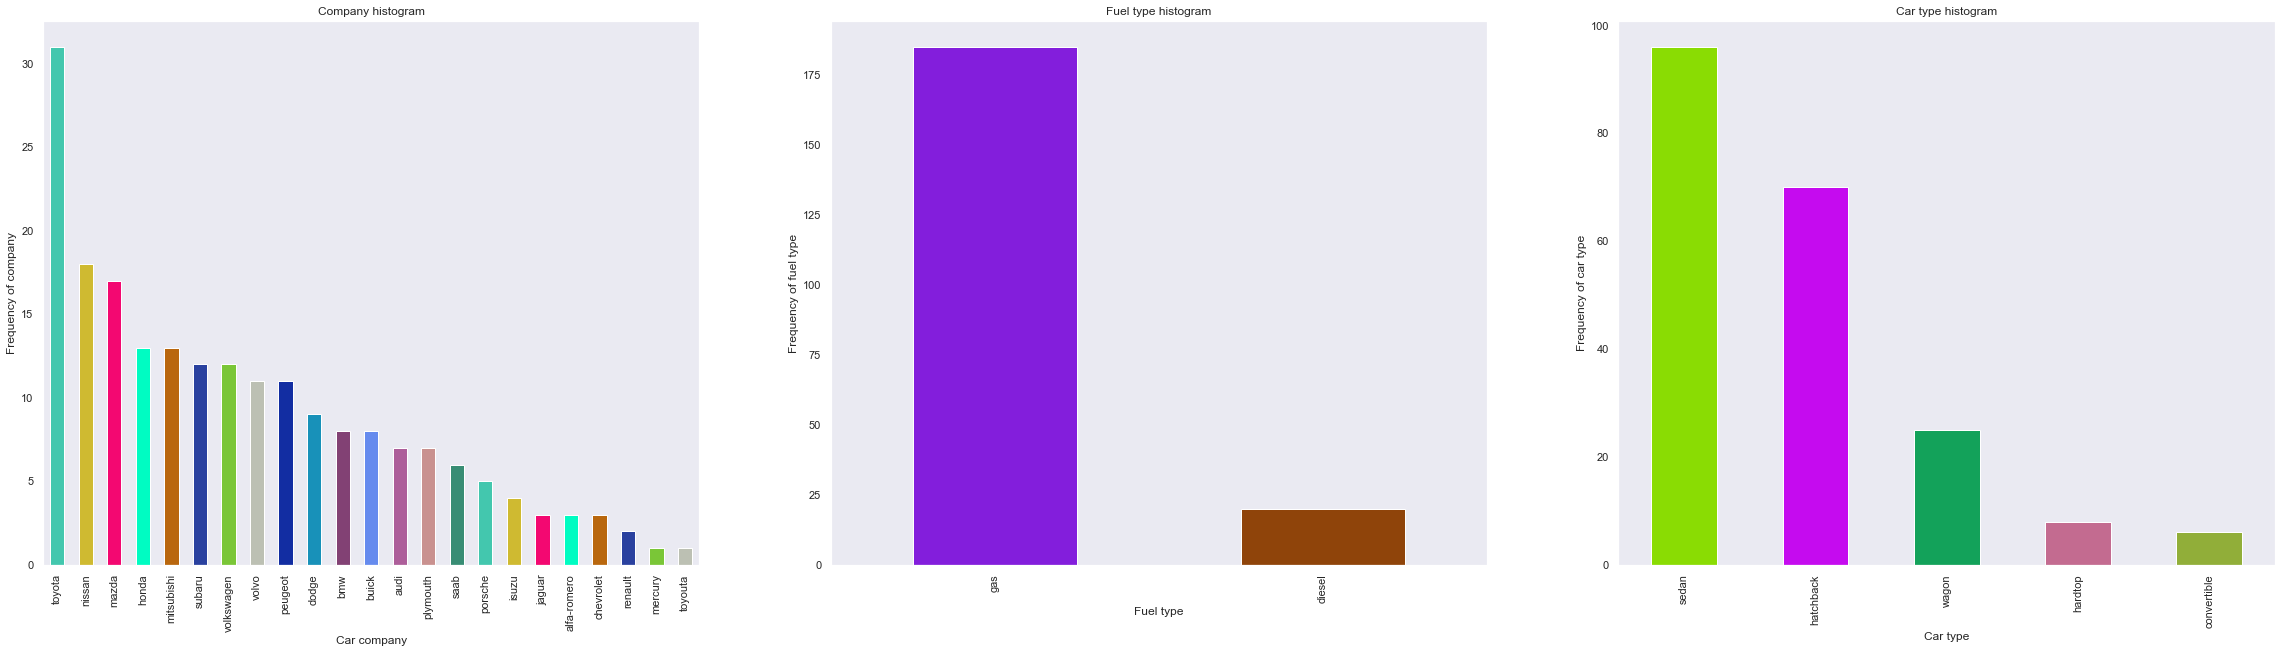

In [15]:
plt.figure(figsize= (40,10))

colors = np.random.rand(len(data.Company.value_counts().unique()),3)
plt.subplot(1,3,1)
plt1 = data.Company.value_counts().plot(kind="bar", color=colors)
plt.title("Company histogram")
plt1.set(xlabel= "Car company", ylabel= "Frequency of company")

colors = np.random.rand(2,3)
plt.subplot(1,3,2)
plt2= data.fueltype.value_counts().plot(kind="bar", color=colors)
plt.title("Fuel type histogram")
plt2.set(xlabel="Fuel type", ylabel="Frequency of fuel type")

colors = np.random.rand(5,3)
plt.subplot(1,3,3)
plt3= data.carbody.value_counts().plot(kind="bar", color=colors)
plt.title("Car type histogram")
plt3.set(xlabel ="Car type", ylabel="Frequency of car type");

- Toyota is the most frequent company
- Number of gas fueled cars are more than diesel
- Sedan is the top car prefered

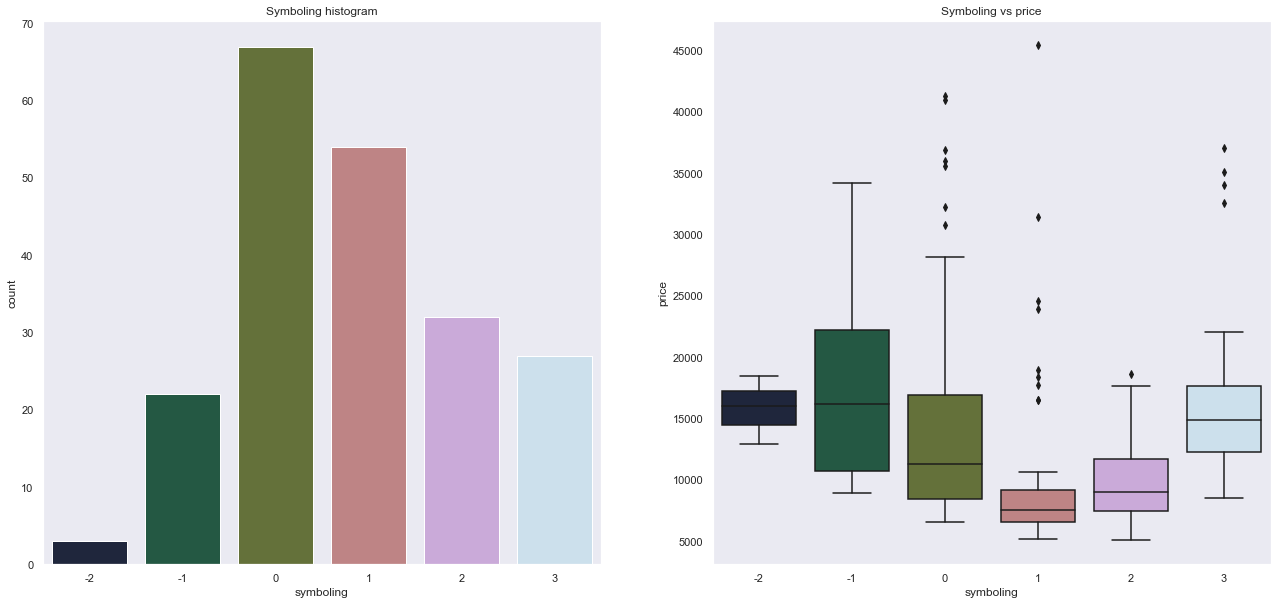

In [16]:
plt.figure(figsize=(22,10))

plt.subplot(1,2,1)
plt.title("Symboling histogram")
sns.countplot(data.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title("Symboling vs price")
sns.boxplot(x=data.symboling, y=data.price, palette=("cubehelix"));

- Symboling with 0 and 1 values are the most numerous
- The cars with -1 symboling seems to be high priced (insurance risk -1 in quite good)

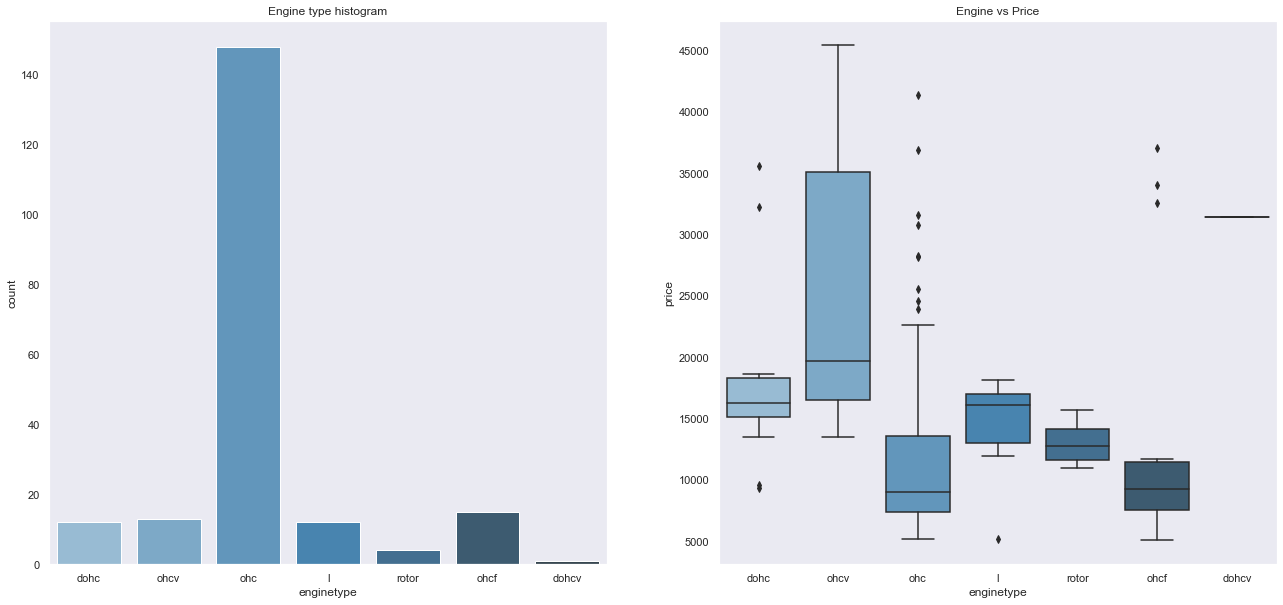

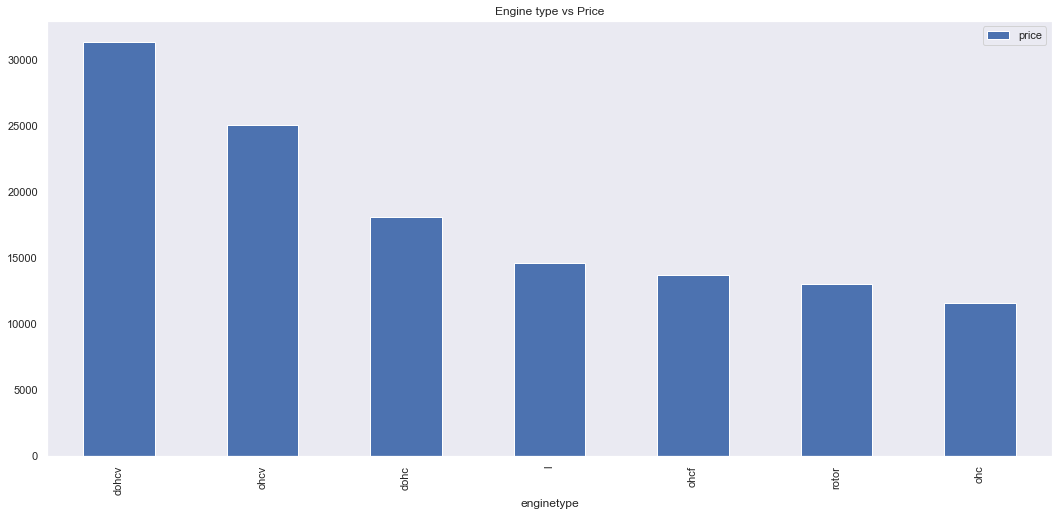

In [17]:
plt.figure(figsize=(22,10))

plt.subplot(1,2,1)
plt.title("Engine type histogram")
sns.countplot(data.enginetype, palette="Blues_d")

plt.subplot(1,2,2)
plt.title("Engine vs Price")
sns.boxplot(x=data.enginetype, y= data.price, palette="Blues_d")

df= pd.DataFrame(data.groupby(["enginetype"])["price"].mean().sort_values(ascending=False))
df.plot.bar(figsize=(18,8))
plt.title("Engine type vs Price");

- ohc Engine type seems to be the most favored
- ohcv has the highest price range, ohc and ohcf have the below price range

<Figure size 2160x720 with 0 Axes>

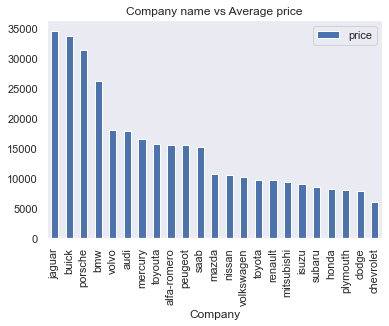

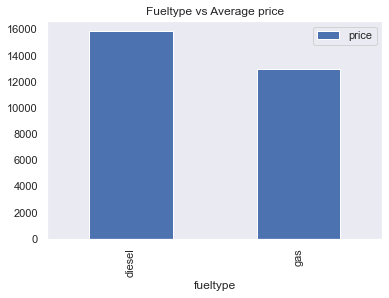

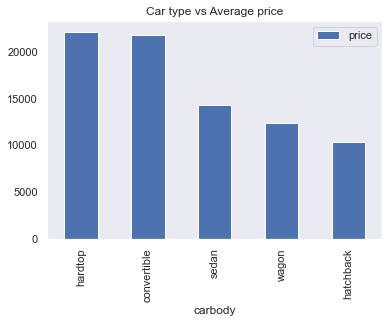

In [18]:
plt.figure(figsize=(30,10))

df= pd.DataFrame(data.groupby(["Company"])["price"].mean().sort_values(ascending=False))
df.plot.bar()
plt.title("Company name vs Average price")

df= pd.DataFrame(data.groupby(["fueltype"])["price"].mean().sort_values(ascending=False))
df.plot.bar()
plt.title("Fueltype vs Average price")

df= pd.DataFrame(data.groupby(["carbody"])["price"].mean().sort_values(ascending=False))
df.plot.bar()
plt.title("Car type vs Average price");

- Jaguar and Buick have the highest avrage price
- Diesel has higher average price than gas
- Hardtop and Convertible have higher average price


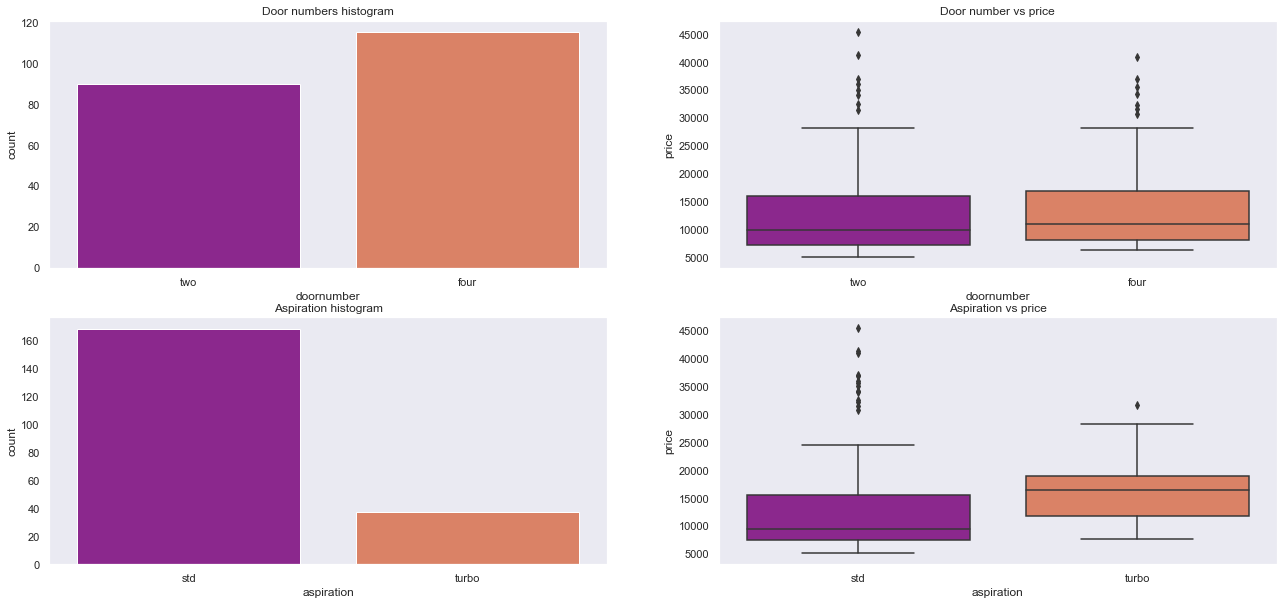

In [19]:
plt.figure(figsize=(22,10))

plt.subplot(2,2,1)
plt.title("Door numbers histogram")
sns.countplot(data.doornumber, palette=("plasma"))

plt.subplot(2,2,2)
plt.title("Door number vs price")
sns.boxplot(x=data.doornumber, y=data.price, palette=("plasma"))

plt.subplot(2,2,3)
plt.title("Aspiration histogram")
sns.countplot(data.aspiration, palette=("plasma"))

plt.subplot(2,2,4)
plt.title("Aspiration vs price")
sns.boxplot(x=data.aspiration, y=data.price, palette=("plasma"));

- Doornumber does not affect price so much
- Aspiration with turbo have higher price range than std

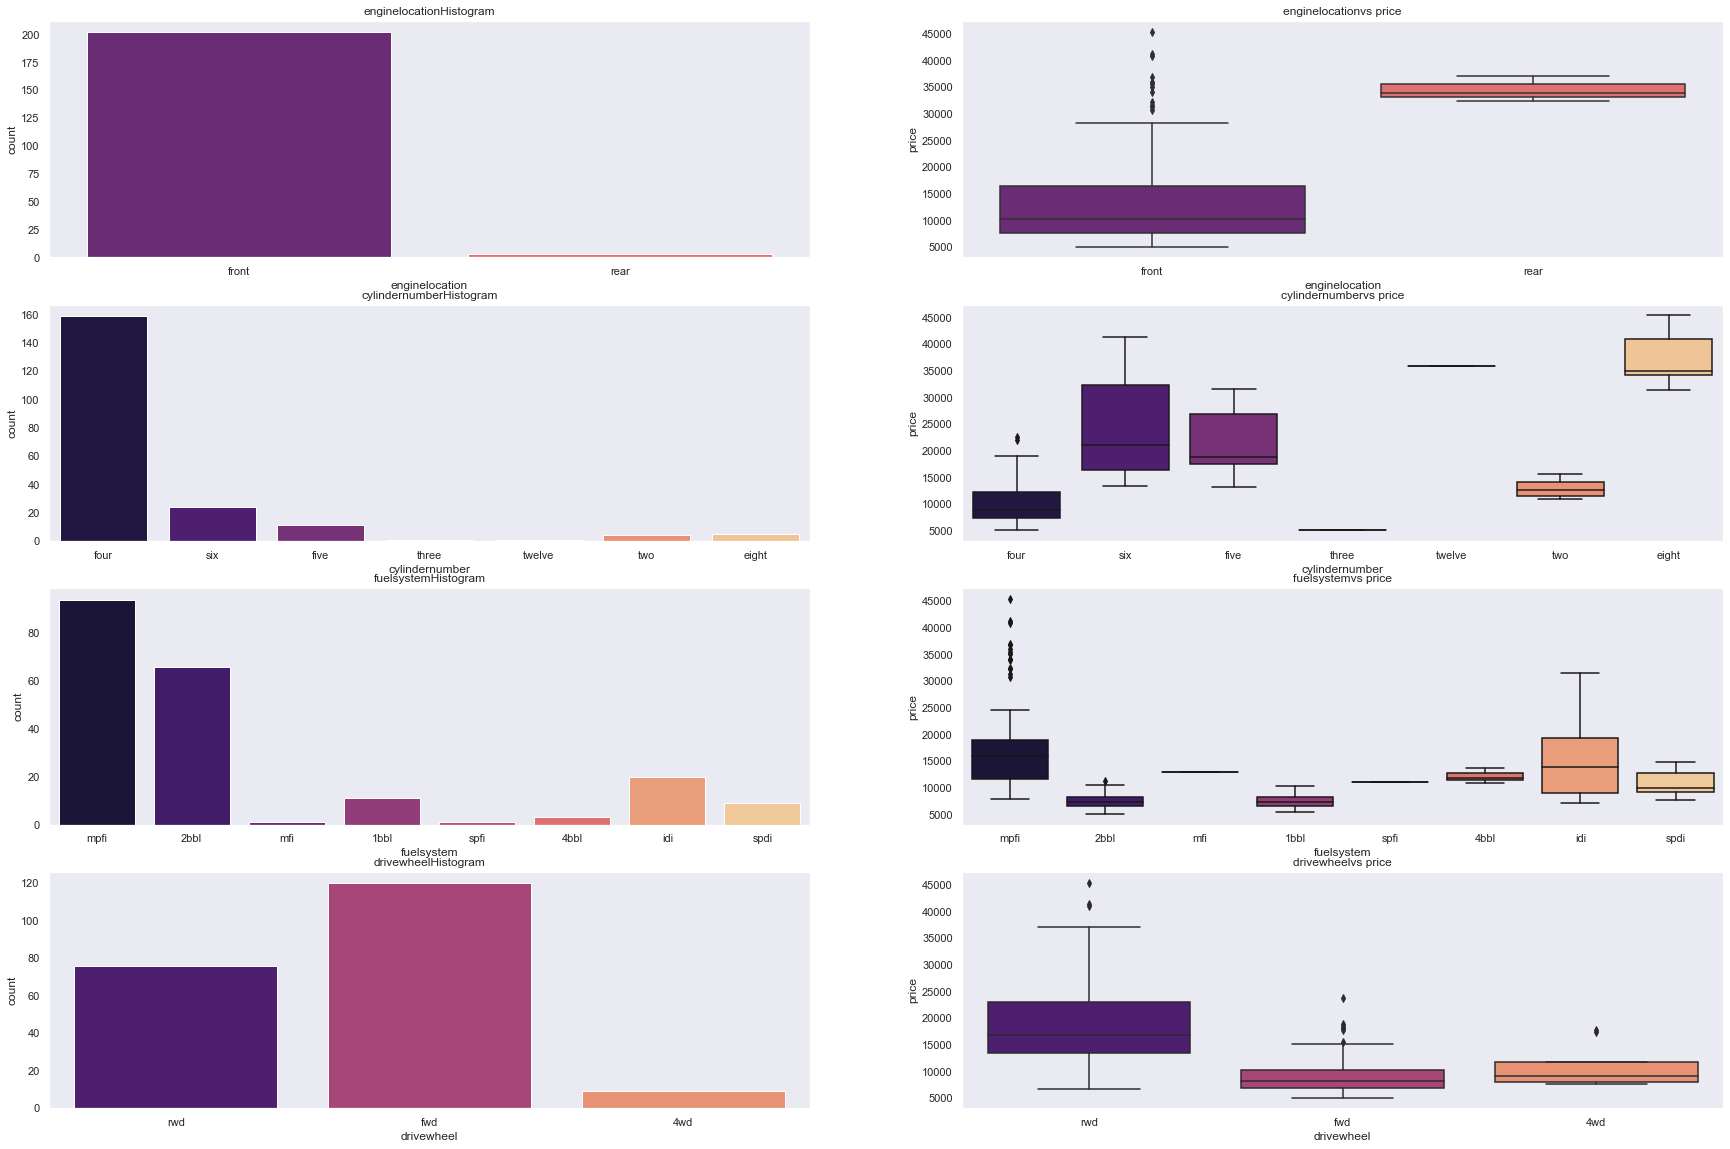

In [20]:
def plot_count (x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+ "Histogram")
    sns.countplot(x=data[x], palette=("magma"))
    plt.subplot(4,2,fig+1)
    plt.title(x+ "vs price")
    sns.boxplot(x=data[x], y=data["price"], palette=("magma"))
    
plt.figure(figsize=(30,20))
plot_count("enginelocation",1)
plot_count("cylindernumber",3)
plot_count("fuelsystem",5)
plot_count("drivewheel",7);

- Very few datapoints for enginelocation to make an inference
- Most common number of cylinders are four, five, six. Thought eight cylinders are the most expensive
- mpfi and 2bbl are most common type of fuel system. mpfi and idi having the highest price range
- Significant difference in driverwheel category. Most hi ranged cars prefer rwd drivewheel

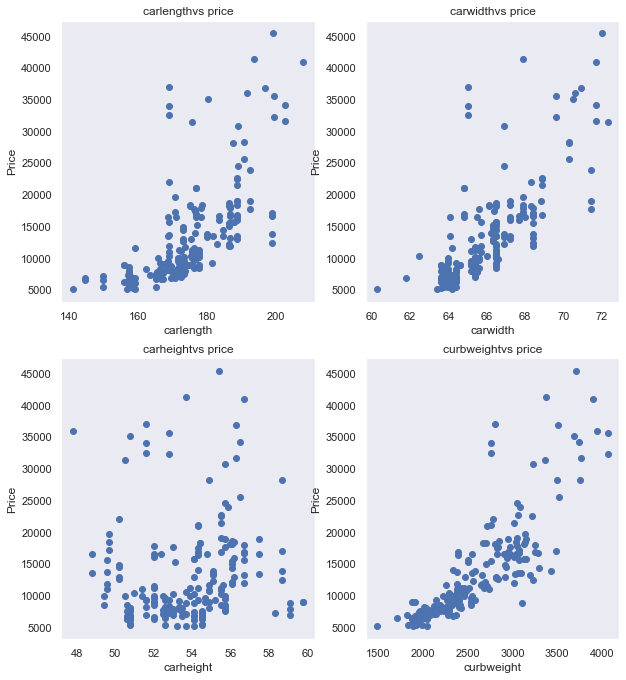

In [21]:
def scatter (x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data[x], data["price"])
    plt.title(x+ "vs price")
    plt.ylabel("Price")
    plt.xlabel(x)

plt.figure(figsize=(10,30))

scatter("carlength",1)
scatter("carwidth",2)
scatter("carheight",3)
scatter("curbweight",4);

- Carlength, curbweight, carwidth seems to have a positive correlation with price
- Carheight doesn't show any type of correlation with price

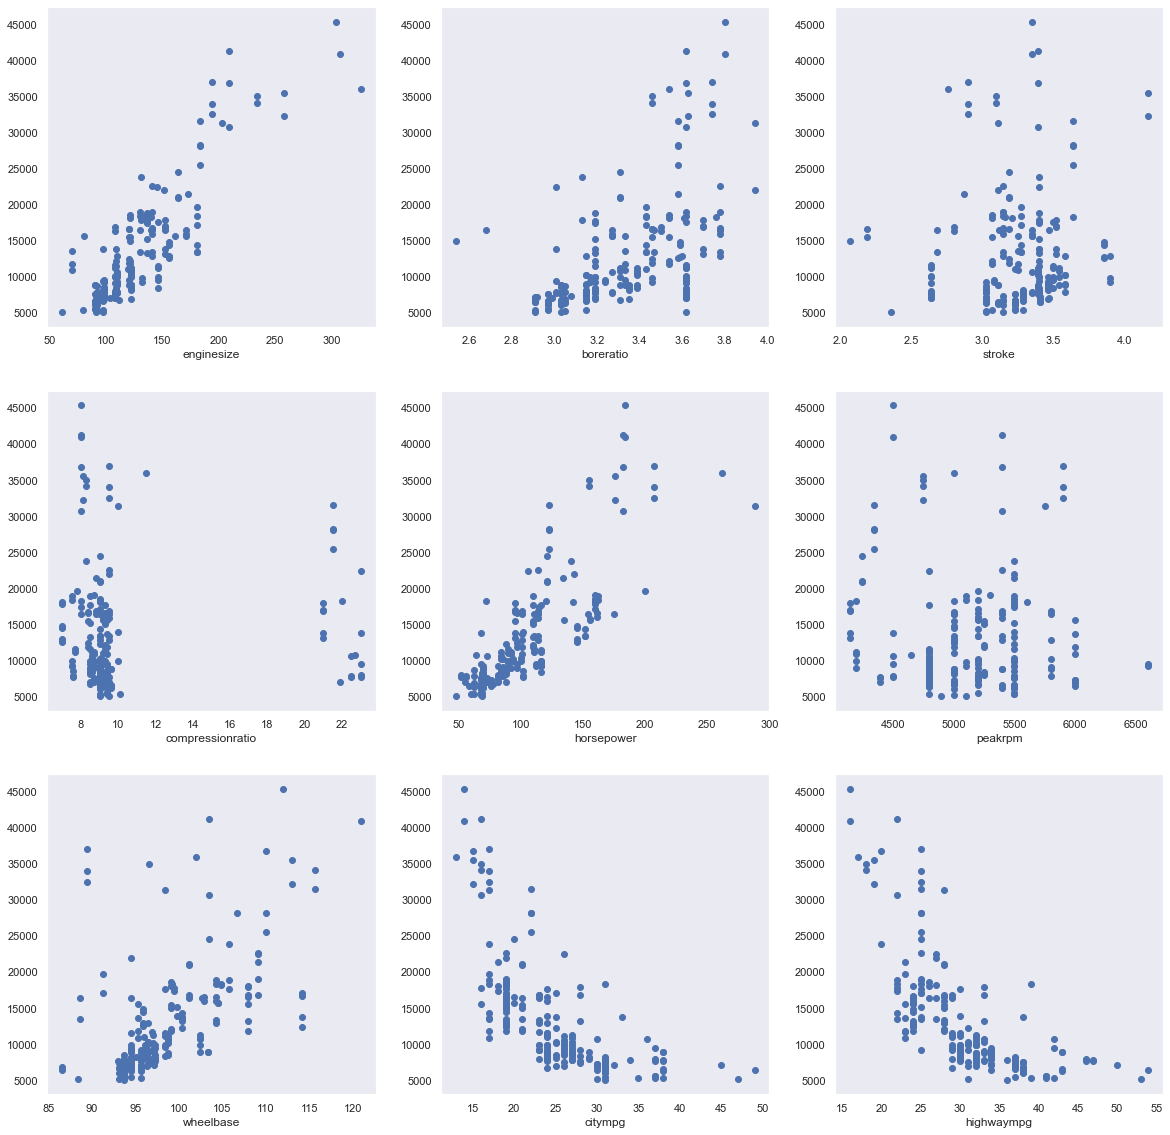

In [22]:
def scatter (x,fig):
    plt.subplot(3,3,fig)
    plt.scatter(data[x], data["price"])
    plt.xlabel(x)

plt.figure(figsize=(20,20))

scatter("enginesize",1)
scatter("boreratio",2)
scatter("stroke",3)
scatter("compressionratio",4)
scatter("horsepower",5)
scatter("peakrpm",6)
scatter("wheelbase",7)
scatter("citympg",8)
scatter("highwaympg",9);

- enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
- citympg, highwaympg - seem to have a significant negative correlation with price.

In [23]:
data["fueleconomy"]= (0.55*data["citympg"]) +(0.45*data["highwaympg"]) 

In [24]:
#Binning the companies based of avr price
data["price"]=data["price"].astype("int")
temp=data.copy()
table=temp.groupby(["Company"])["price"].mean()
temp= temp.merge(table.reset_index(), how="left", on="Company")
bins= [0,10000,20000,40000]
cars_bins= ["Budget","Medium","Highend"]
data["Carsrange"]= pd.cut(temp["price_y"],bins,right=False, labels=cars_bins)
data.head()

,car_ID,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,Carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


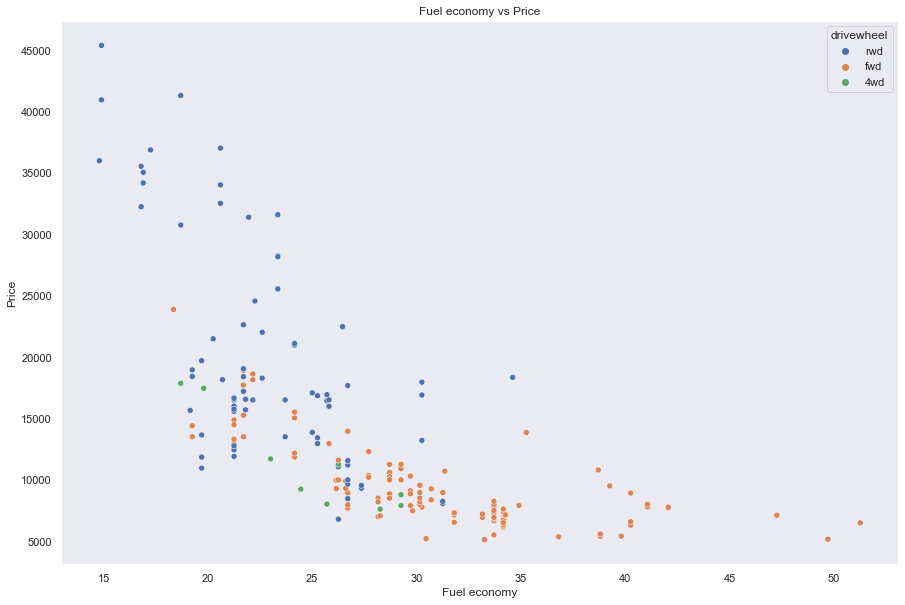

In [25]:
plt.figure(figsize=(15,10))
plt.title("Fuel economy vs Price")
sns.scatterplot(x=data["fueleconomy"],y=data["price"], hue=data["drivewheel"])
plt.xlabel("Fuel economy")
plt.ylabel("Price");

- Fuel economy has a negative significant correlation with price 

<Figure size 1584x1440 with 0 Axes>

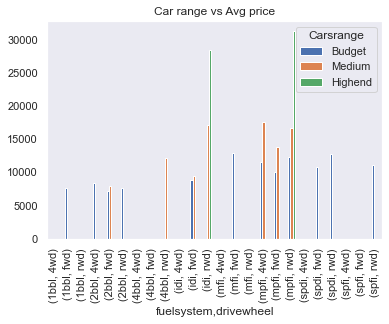

In [26]:
plt.figure(figsize=(22,20))
df = pd.DataFrame(data.groupby(["fuelsystem","drivewheel","Carsrange"])["price"].mean().unstack(fill_value=0))
df.plot.bar()
plt.title("Car range vs Avg price");

- High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem

### Significant variables after visual analysis
- Cars Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy 

In [27]:
data_sv = data[['price','fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'Carsrange']]
data_sv.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,Carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


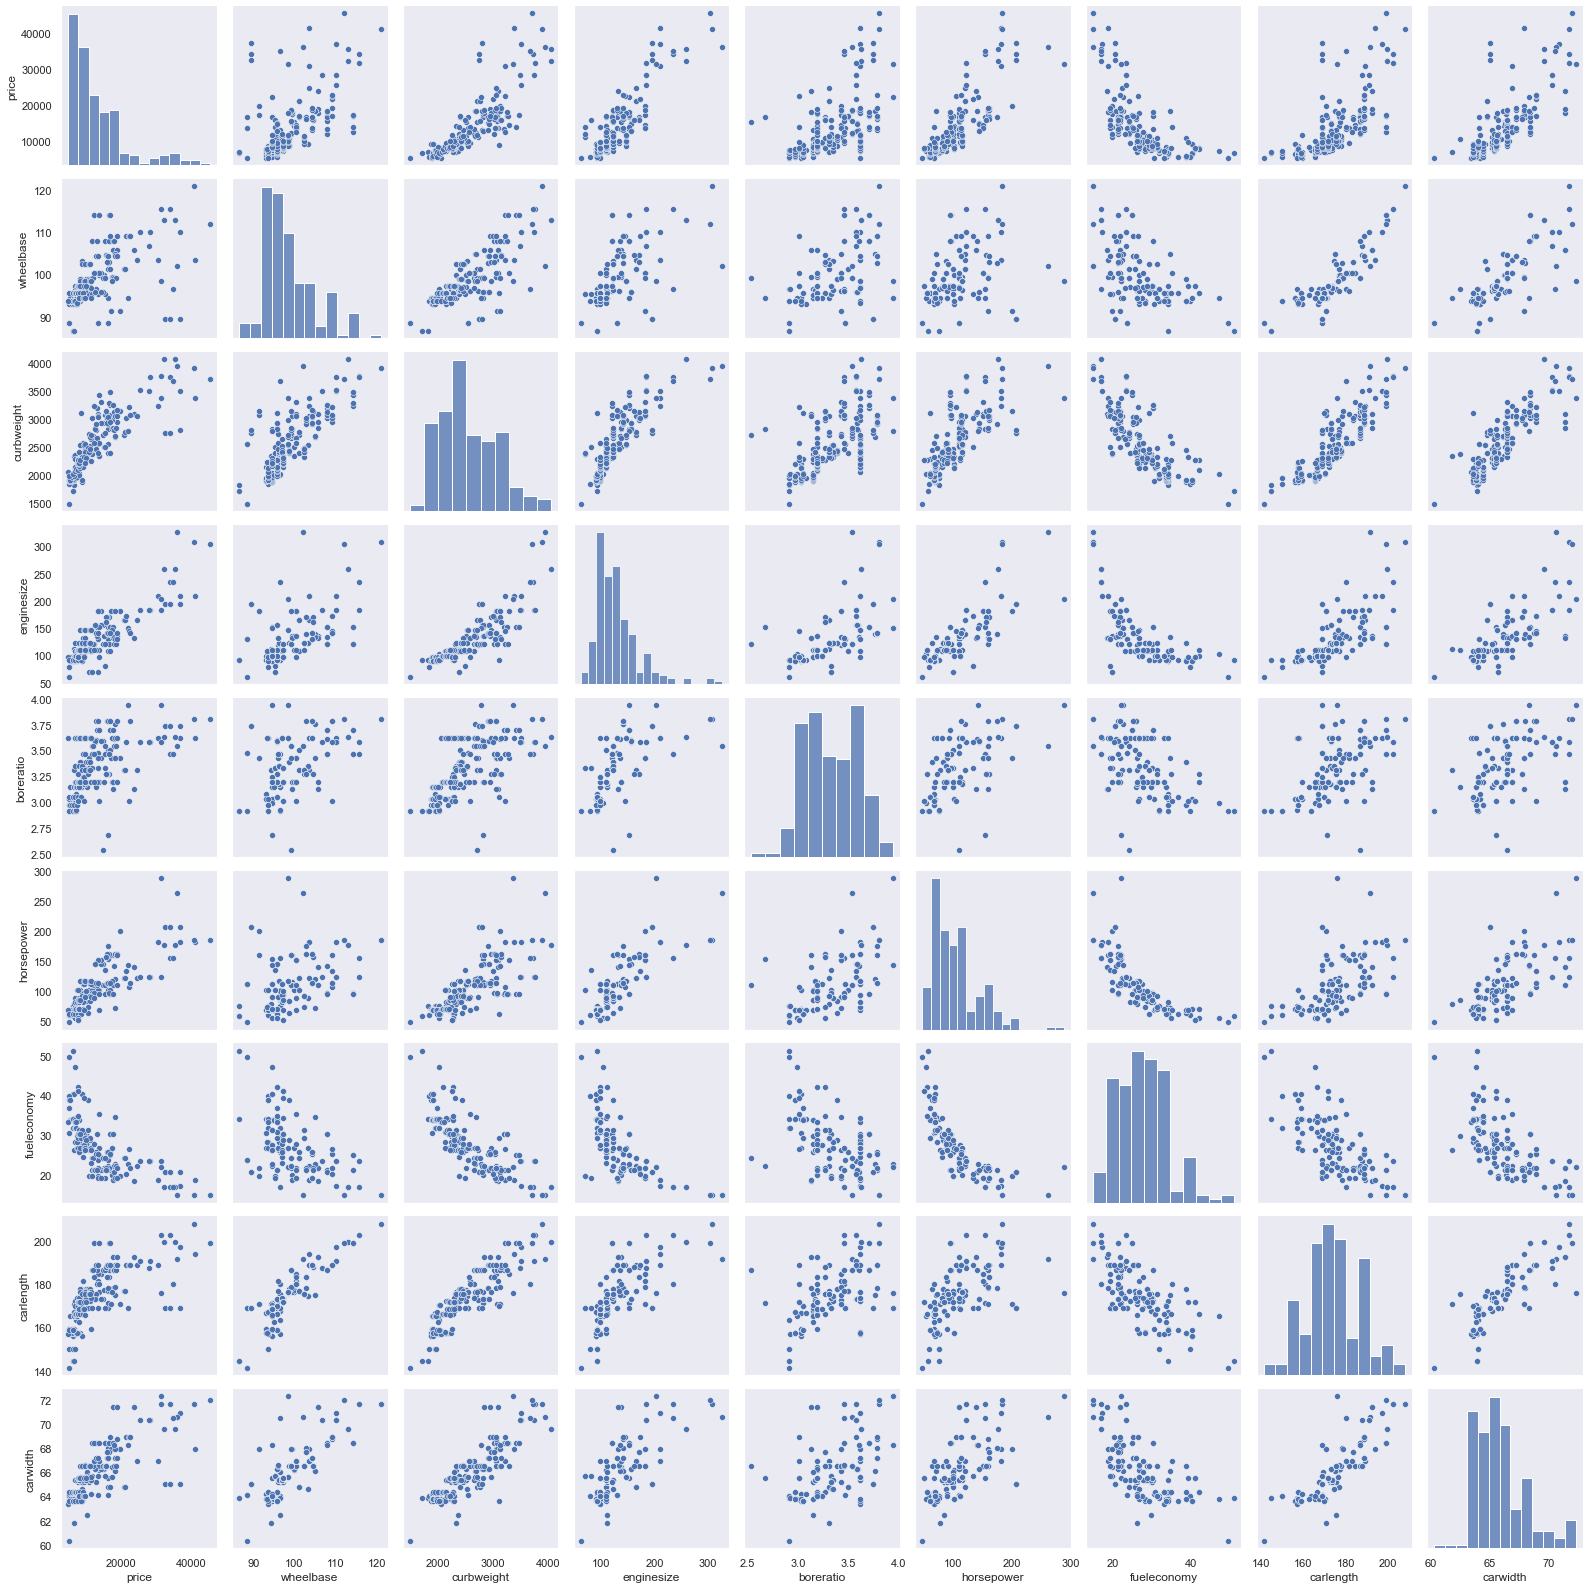

In [28]:
sns.pairplot(data_sv);

In [29]:
#Dummies Variables
def dummies (x,df):
    temp=pd.get_dummies(df[x], drop_first=True)
    df= pd.concat([df, temp], axis=1)
    df.drop([x], axis=1, inplace=True)
    return df

data_sv = dummies('fueltype',data_sv)
data_sv = dummies('aspiration',data_sv)
data_sv = dummies('carbody',data_sv)
data_sv = dummies('drivewheel',data_sv)
data_sv = dummies('enginetype',data_sv)
data_sv = dummies('cylindernumber',data_sv)
data_sv = dummies('Carsrange',data_sv)

In [30]:
data_sv.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


In [31]:
data_sv.shape

(205, 31)

In [32]:
data_sv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        205 non-null    int32  
 1   wheelbase    205 non-null    float64
 2   curbweight   205 non-null    int64  
 3   enginesize   205 non-null    int64  
 4   boreratio    205 non-null    float64
 5   horsepower   205 non-null    int64  
 6   fueleconomy  205 non-null    float64
 7   carlength    205 non-null    float64
 8   carwidth     205 non-null    float64
 9   gas          205 non-null    uint8  
 10  turbo        205 non-null    uint8  
 11  hardtop      205 non-null    uint8  
 12  hatchback    205 non-null    uint8  
 13  sedan        205 non-null    uint8  
 14  wagon        205 non-null    uint8  
 15  fwd          205 non-null    uint8  
 16  rwd          205 non-null    uint8  
 17  dohcv        205 non-null    uint8  
 18  l            205 non-null    uint8  
 19  ohc     

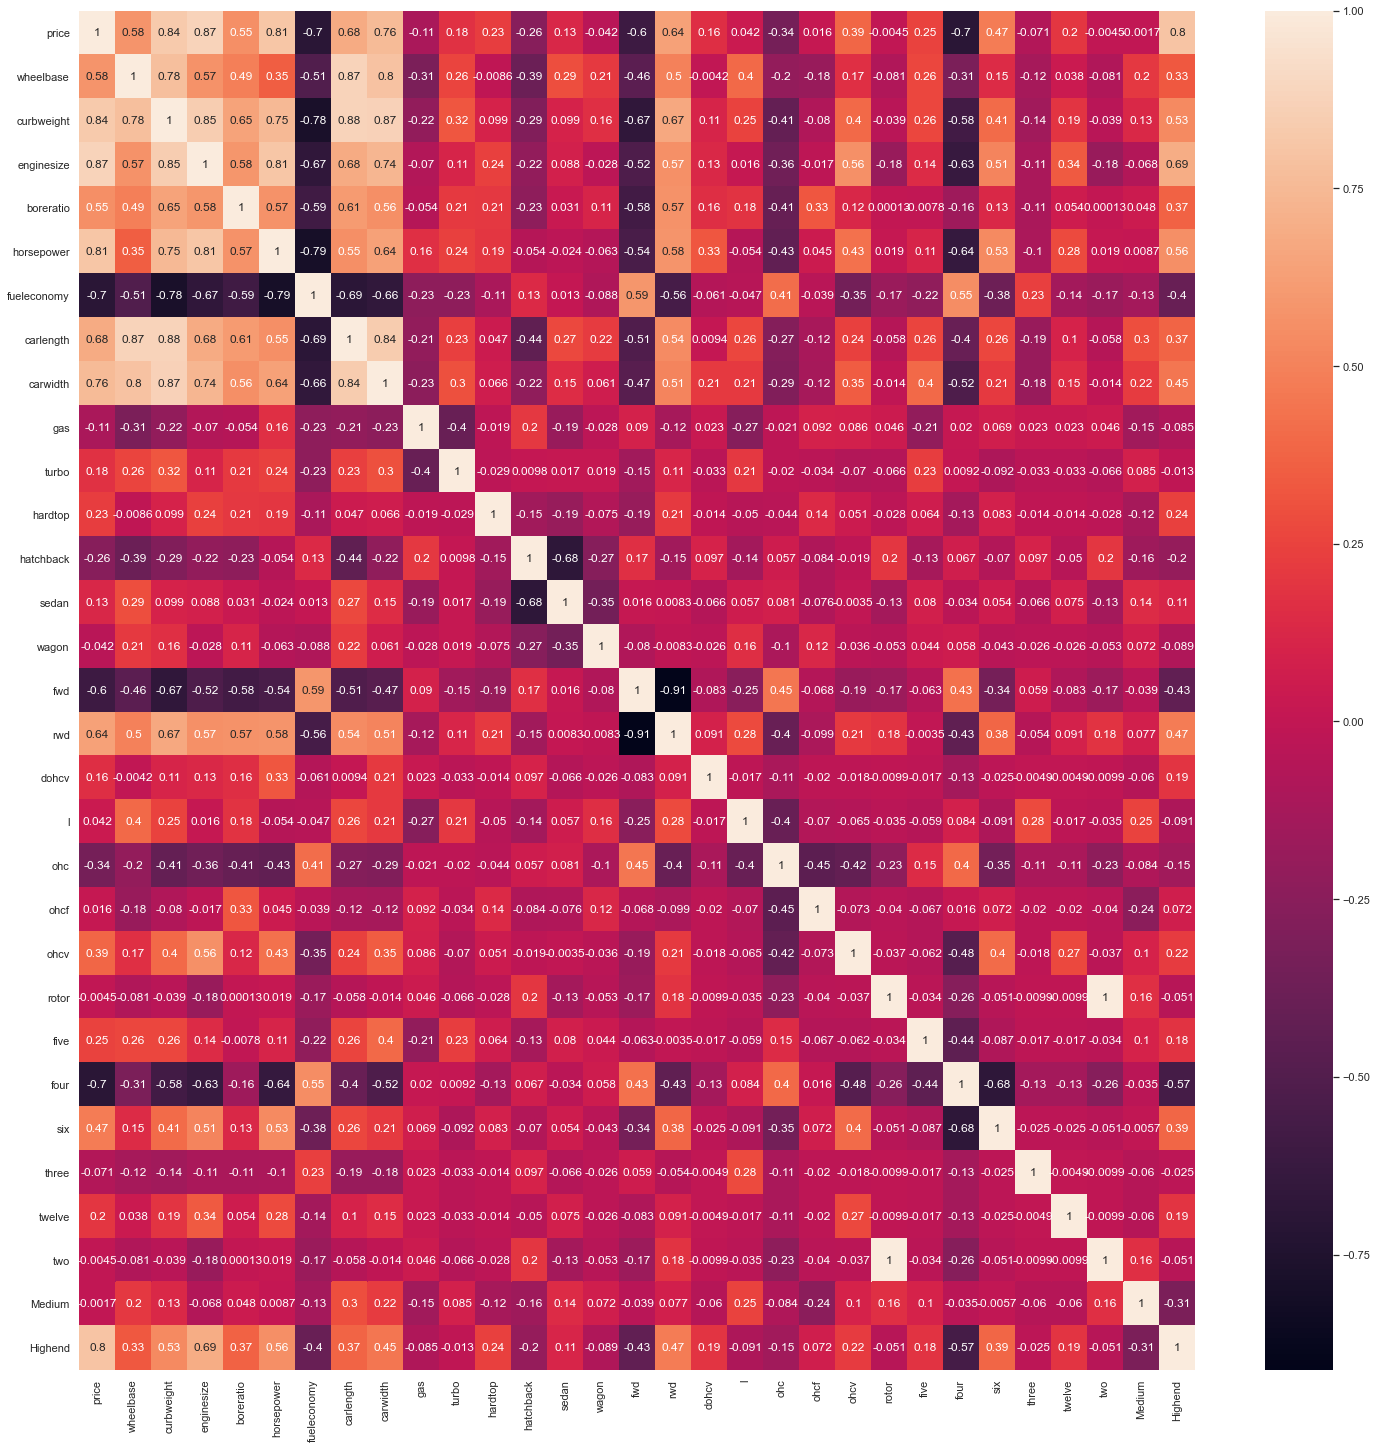

In [33]:
plt.figure(figsize=(25,25))
sns.heatmap(data_sv.corr(), annot=True);

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
num_var = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth']
data_sv[num_var]= scaler.fit_transform(data_sv[num_var])
pd.set_option('display.max_columns', None)
data_sv.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,0.058309,0.411171,0.260377,0.664286,0.262500,0.244170,0.413433,0.316667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,16500,0.058309,0.411171,0.260377,0.664286,0.262500,0.244170,0.413433,0.316667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16500,0.230321,0.517843,0.343396,0.100000,0.441667,0.201646,0.449254,0.433333,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,13950,0.384840,0.329325,0.181132,0.464286,0.225000,0.326475,0.529851,0.491667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,17450,0.373178,0.518231,0.283019,0.464286,0.279167,0.137174,0.529851,0.508333,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [35]:
y= data_sv["price"]

In [36]:
X= data_sv.drop(["price"], axis=1) 

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((164, 30), (41, 30), (164,), (41,))

### Regression Models

#### RandomForestRegressor

In [38]:
models={}

In [39]:
score_fnc= r2_score
param_grid= {"n_estimators": np.arange(10,200,10), "max_features": np.arange(1,32), "bootstrap":[True,False]}
rf = RandomForestRegressor(random_state=24)
val_cv = KFold(shuffle=True, random_state=24)
model_selection= RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=200, cv=val_cv,
                                    scoring=make_scorer(score_fnc), n_jobs=-1, verbose=2)
model_selection.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.3min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0....
                   param_distrib

In [40]:
model_selection.best_params_ , model_selection.best_score_

({'n_estimators': 170, 'max_features': 8, 'bootstrap': False},
 0.9376418474285515)

In [41]:
RandomF= RandomForestRegressor(max_features=8, n_estimators=170, bootstrap=False)
RandomF.fit(X_train,y_train)
prediction=RandomF.predict(X_test)
result=r2_score(prediction,y_test)
print(result)
Random_Forest={'Random_Forest':result}
models.update(Random_Forest)

0.8918251039631409


#### SGDRegressor

In [42]:
param_grid= {"alpha": np.logspace(-5, 0, 50), "loss":['squared_loss',
    'huber', 'epsilon_insensitive'], "penalty": ["l1","l2"],"learning_rate": ["optimal","adaptive"]}
SGD = SGDRegressor(random_state=24)
val_cv = KFold(shuffle=True, random_state=24)
model_selection= RandomizedSearchCV(estimator=SGD, param_distributions=param_grid, n_iter=200, cv=val_cv,
                                    scoring=make_scorer(score_fnc), n_jobs=-1, verbose=2)
model_selection.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   10.8s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
                   error_score=nan,
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=24,
                                          shuffle=True, tol=...
       1.20679264e-01, 1.52641797e-01, 1.93069773e-01, 2.44205309e-01,
       3.08884360e-01, 3.90693994e-01, 4.94171336e-01, 6.25055193e-01,
       7.90604321e-01, 1.00000000e+00]),
                                        'learning_rate': ['optimal',
 

In [43]:
model_selection.best_params_ , model_selection.best_score_

({'penalty': 'l2',
  'loss': 'squared_loss',
  'learning_rate': 'adaptive',
  'alpha': 0.000868511373751353},
 0.8869515204882973)

In [44]:
SDGR= SGDRegressor(penalty='l2', loss='squared_loss', learning_rate='adaptive', alpha=0.00087)
SDGR.fit(X_train,y_train)
prediction=SDGR.predict(X_test)
result=r2_score(prediction,y_test)
print(result)
SDGRegressor={'SDGRegressor':result}
models.update(SDGRegressor)

0.8512082159569414


#### Ridge Regression

In [45]:
Rid = Ridge(random_state=24)
param_grid = {'alpha': (np.logspace(-8, 8, 100)),"fit_intercept": [True, False],
              "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
val_cv = KFold(shuffle=True, random_state=24)
model_selection= RandomizedSearchCV(estimator=Rid, param_distributions=param_grid, n_iter=200, cv=val_cv,
                                    scoring=make_scorer(score_fnc), n_jobs=-1, verbose=2)
model_selection.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.1s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
                   error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=24, solver='auto', tol=0.001),
                   iid='deprecated', n_iter=200, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.4...
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08]),
                                        'fit_intercept': [True, False],
                                        'solver': ['svd', 'cholesky', 'lsqr',
                                                   'sparse_cg', 'sag',
                                     

In [46]:
model_selection.best_params_ , model_selection.best_score_

({'solver': 'svd', 'fit_intercept': True, 'alpha': 0.27185882427329455},
 0.8970397736818301)

In [47]:
Ridg= Ridge(alpha= 0.27186, solver= "svd", fit_intercept="True")
Ridg.fit(X_train,y_train)
prediction=Ridg.predict(X_test)
result=r2_score(prediction,y_test)
print(result)
Ridge_Regressor={'Ridge_Regressor':result}
models.update(Ridge_Regressor)

0.8569305536093379


#### Lasso Regression

In [48]:
La = Lasso(random_state=24)
param_grid = {'alpha': (np.logspace(-8, 8, 100))}
val_cv = KFold(shuffle=True, random_state=24)
model_selection= RandomizedSearchCV(estimator=La, param_distributions=param_grid, n_iter=200, cv=val_cv,
                                    scoring=make_scorer(score_fnc), n_jobs=-1, verbose=2)
model_selection.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
                   error_score=nan,
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=24, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=200, n_jobs=-1,
                   param_distributions={'alpha': array([1.000000...
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scor

In [49]:
model_selection.best_params_ , model_selection.best_score_

({'alpha': 1.74752840000769}, 0.886778065200297)

In [50]:
Lasso= Lasso(alpha=1.7475)
Lasso.fit(X_train,y_train)
prediction=Lasso.predict(X_test)
result=r2_score(prediction,y_test)
print(result)
Lasso_Regressor={'Lasso_Regressor':result}
models.update(Lasso_Regressor)

0.8617355733550177


#### Linear Regression

In [51]:
Lr= LinearRegression()
Lr.fit(X_train,y_train)
prediction=Lr.predict(X_test)
result=r2_score(prediction,y_test)
print(result)
Linear_Regressor={'Linear_Regressor':result}
models.update(Linear_Regressor)

0.8618581040807186


#### XGBRegressor

In [52]:
XGBoost = XGBRegressor(random_state=11)
param_grid = {'learning_rate': [.1, .06, .03, .01],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : np.arange(80,140,20)}
val_cv = KFold(shuffle=True, random_state=12)
model_selection= RandomizedSearchCV(estimator=XGBoost, param_distributions=param_grid, n_iter=200, cv=val_cv,
                                    scoring=make_scorer(score_fnc), n_jobs=-1, verbose=2)
model_selection.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   41.9s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=True),
                   error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=...
                   iid='deprecated', n_iter=200, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7],
                                        'learning_rate': [0.1, 0.06, 0.03,
                                                 

In [53]:
model_selection.best_params_ , model_selection.best_score_

({'subsample': 0.5,
  'n_estimators': 100,
  'min_child_weight': 5,
  'max_depth': 3,
  'learning_rate': 0.1,
  'colsample_bytree': 0.5},
 0.9469757930745566)

In [54]:
XGBR= XGBRegressor(subsample= 0.5, n_estimators= 100, min_child_weight= 5, max_depth=3,
                   learning_rate=0.1, colsample_bytree=0.5)
XGBR.fit(X_train,y_train)
prediction=XGBR.predict(X_test)
result=r2_score(prediction,y_test)
print(result)
XGBRegressor={'XGBRegressor':result}
models.update(XGBRegressor)

0.9037525984395454


In [55]:
for key, value in models.items():
    print(key,' : ', round(value,4))

Random_Forest  :  0.8918
SDGRegressor  :  0.8512
Ridge_Regressor  :  0.8569
Lasso_Regressor  :  0.8617
Linear_Regressor  :  0.8619
XGBRegressor  :  0.9038


## :)